In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
# Replace the file path with the correct location of your Mall_Customers.csv file
file_path = '/content/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())
print("\nData Summary:")
print(data.describe())

# Select features for clustering
# We are using 'Annual Income (k$)' and 'Spending Score (1-100)' as our primary clustering features.
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 1: Use the elbow method to find the optimal number of clusters
print("\nDetermining the optimal number of clusters using the elbow method...")
inertia = []  # List to store the inertia values for each k
cluster_range = range(1, 11)  # We will try k values from 1 to 10

for k in cluster_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the KMeans model to the data
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)
    print(f"Clusters: {k}, Inertia: {kmeans.inertia_}")


# Based on the elbow plot, choose the optimal number of clusters
optimal_k = 5  # Assuming 5 clusters based on elbow plot
print(f"\nUsing k = {optimal_k} for clustering.")



First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150

In [ ]:

# Step 2: Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)  # Add cluster labels to the dataset

# Display the first few rows with cluster labels
print("\nDataset with Cluster Labels:")
print(data.head())



Dataset with Cluster Labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


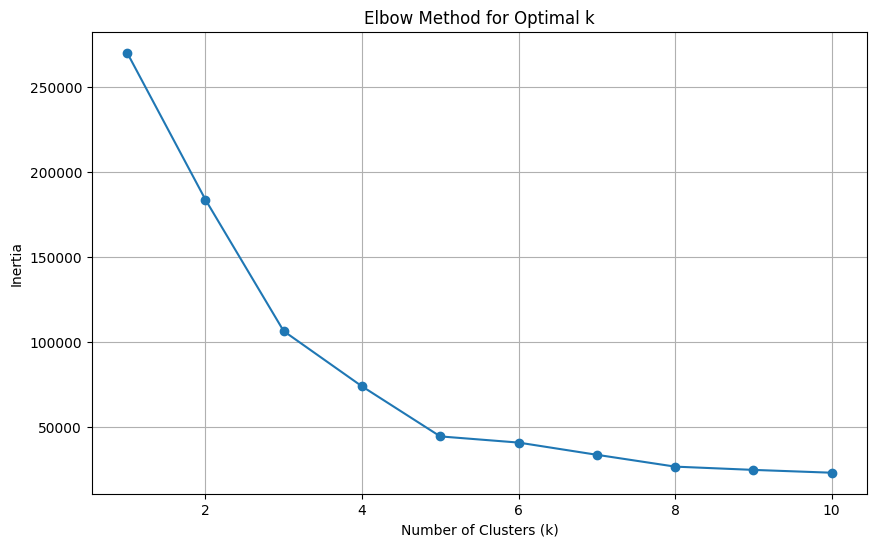

In [ ]:
# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

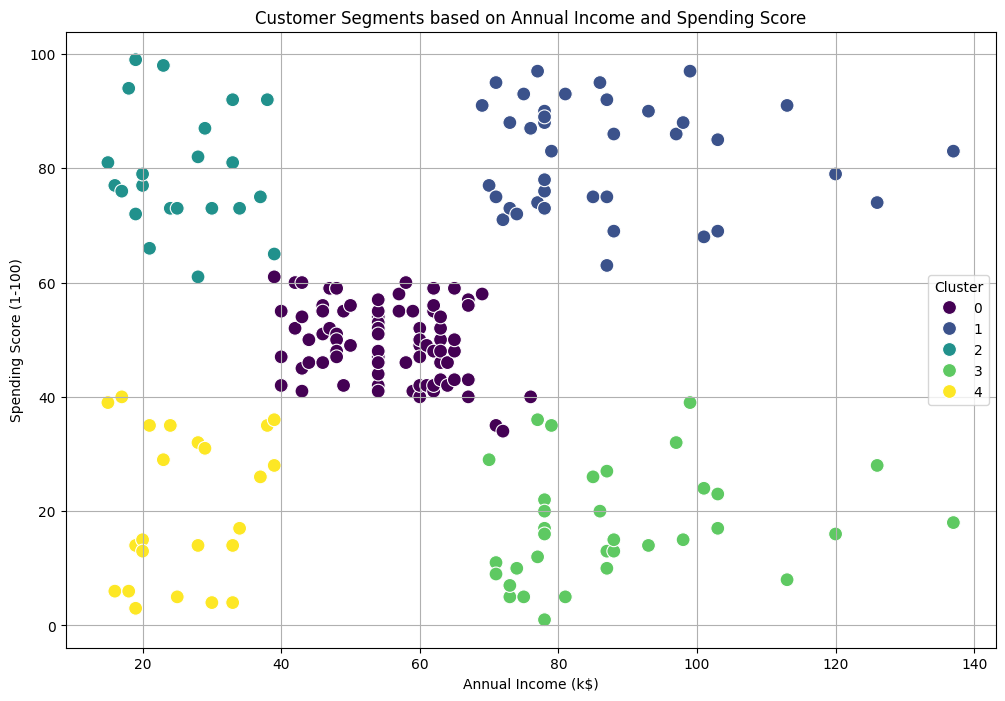

In [ ]:
# Step 3: Visualize the clusters to understand the customer segments
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100, edgecolor='w')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:

# Step 4: Display cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [ ]:
# Step 5: Analyze each cluster to interpret the customer segments
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average Annual Income: {cluster_data['Annual Income (k$)'].mean()}")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean()}")



Cluster 0 Summary:
Number of customers: 81
Average Annual Income: 55.2962962962963
Average Spending Score: 49.51851851851852

Cluster 1 Summary:
Number of customers: 39
Average Annual Income: 86.53846153846153
Average Spending Score: 82.12820512820512

Cluster 2 Summary:
Number of customers: 22
Average Annual Income: 25.727272727272727
Average Spending Score: 79.36363636363636

Cluster 3 Summary:
Number of customers: 35
Average Annual Income: 88.2
Average Spending Score: 17.114285714285714

Cluster 4 Summary:
Number of customers: 23
Average Annual Income: 26.304347826086957
Average Spending Score: 20.91304347826087
